In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

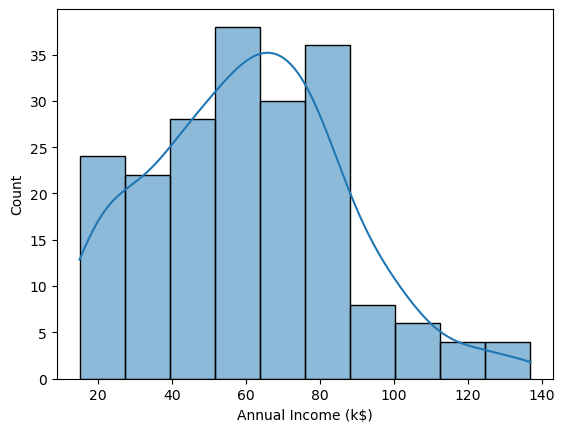

In [28]:
sns.histplot(df['Annual Income (k$)'],kde=True)

In [29]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

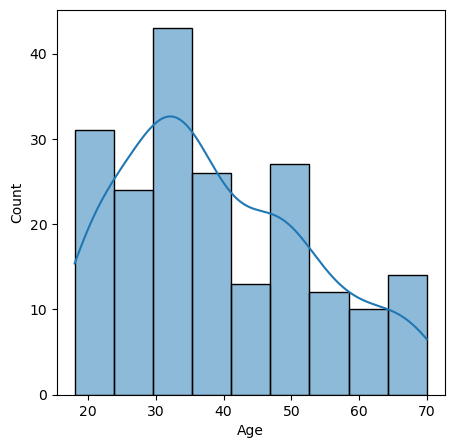

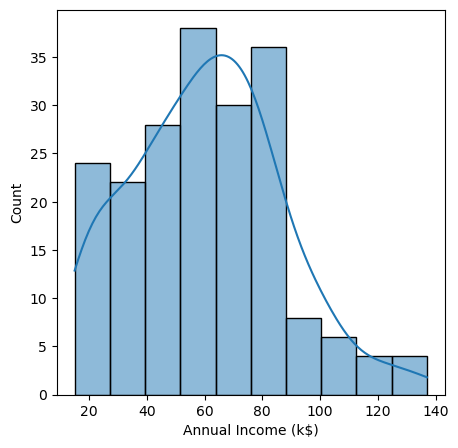

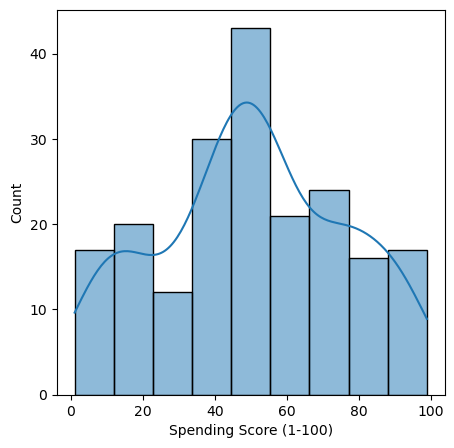

In [43]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(5,5))
    sns.histplot(df[i],kde=True)
    

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

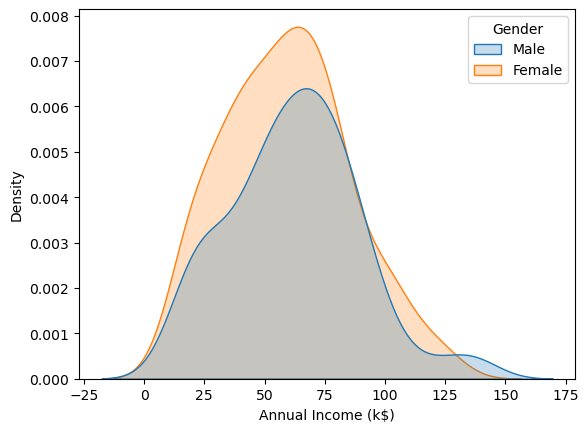

In [50]:
sns.kdeplot(data=df, x="Annual Income (k$)", hue="Gender",fill=True)

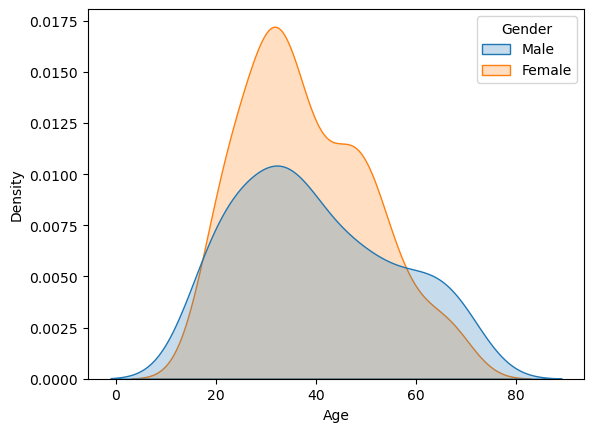

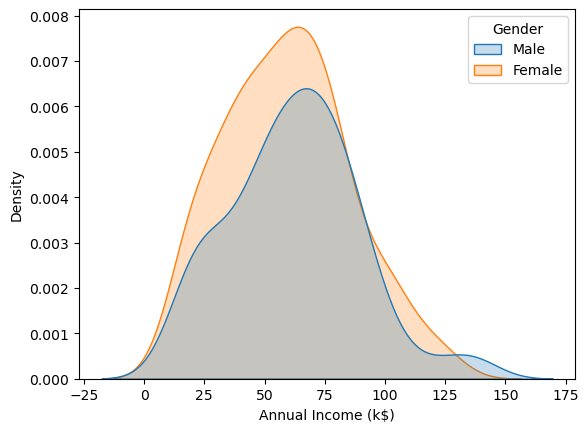

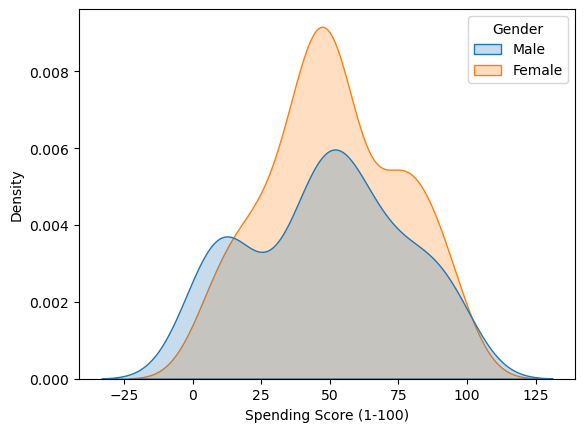

In [52]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, hue="Gender",fill=True)
    

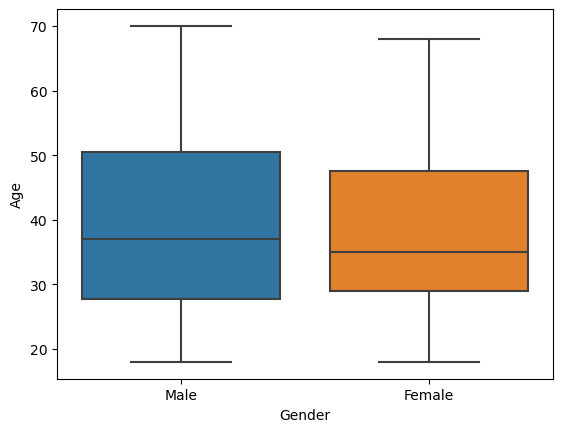

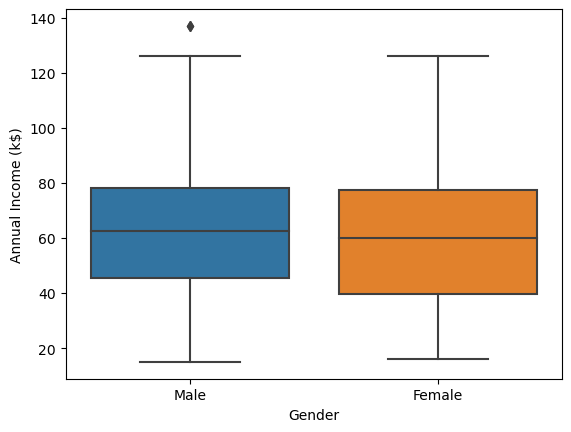

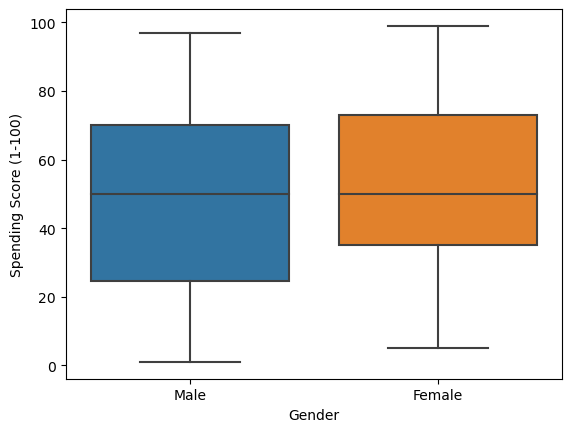

In [53]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender',y=df[i])
    

In [55]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

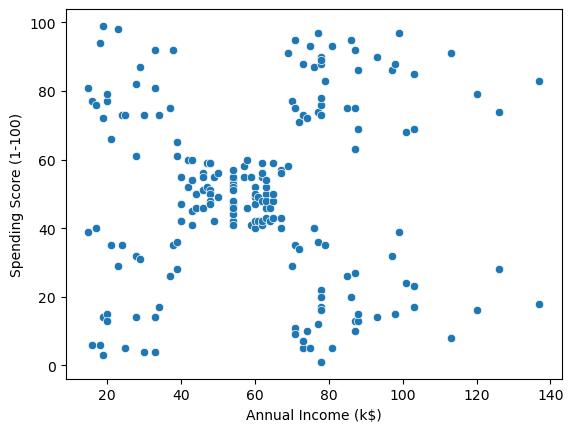

In [56]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

/Users/trinhhoa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


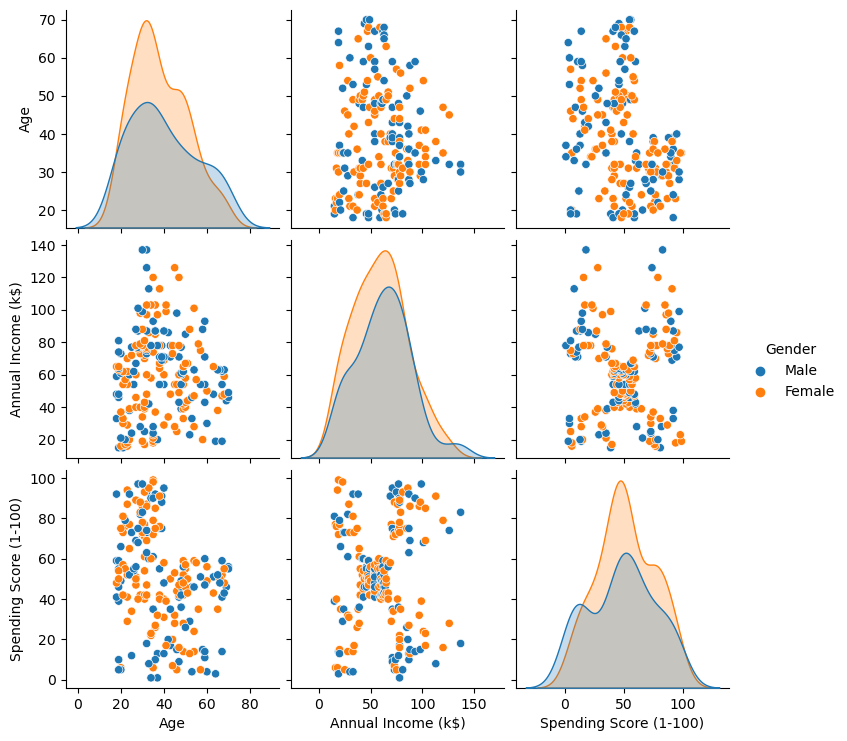

In [64]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(data=df,hue='Gender')

In [71]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [73]:
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

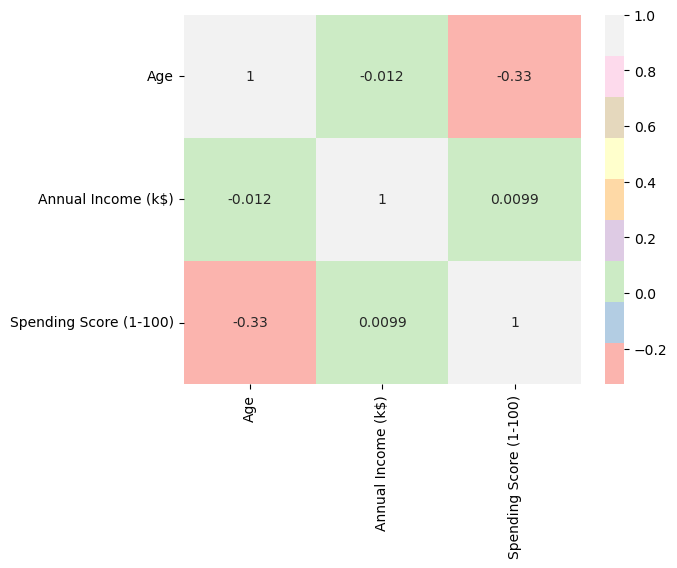

In [77]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Pastel1')

## Clustering Univariate, Bivariate, Multivariate

In [141]:
clustering1 = KMeans(n_clusters=3,n_init=10)

In [142]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3, n_init=10)

In [143]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [144]:
df['Income Cluster'] = clustering1.labels_
df.tail(20)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
180,Female,37,97,32,1
181,Female,32,97,86,1
182,Male,46,98,15,1
183,Female,29,98,88,1
184,Female,41,99,39,1
185,Male,30,99,97,1
186,Female,54,101,24,1
187,Male,28,101,68,1
188,Female,41,103,17,1
189,Female,36,103,85,1


In [145]:
df['Income Cluster'].value_counts()

Income Cluster
2    90
0    74
1    36
Name: count, dtype: int64

In [146]:
clustering1.inertia_

23517.33093093093

In [138]:
inertia_scores = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=10)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [139]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23528.15217391306,
 13278.112713472483,
 8493.2293040293,
 5050.9047619047615,
 3941.4163614163635,
 2880.457936507939,
 2220.6341269841278,
 1734.1677489177496]

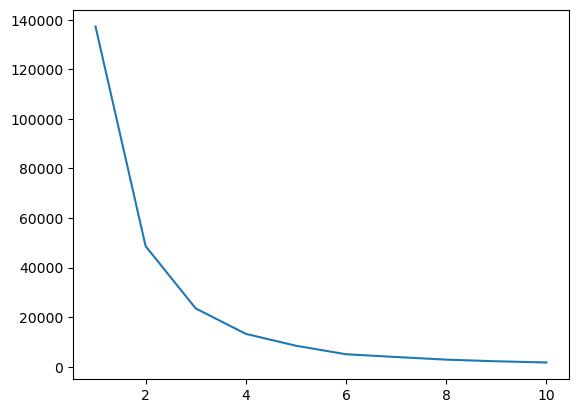

In [140]:
plt.plot(range(1,11),inertia_scores)

In [148]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [151]:
df.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


### Bivariate

In [158]:
clustering2 = KMeans(n_clusters=5,n_init=10)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5, n_init=10)

In [163]:
clustering2.labels_

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [160]:
df['Spending and Income'] = clustering2.labels_
df.head(20)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income
0,Male,19,15,39,0,2
1,Male,21,15,81,0,4
2,Female,20,16,6,0,2
3,Female,23,16,77,0,4
4,Female,31,17,40,0,2
5,Female,22,17,76,0,4
6,Female,35,18,6,0,2
7,Female,23,18,94,0,4
8,Male,64,19,3,0,2
9,Female,30,19,72,0,4


In [161]:
inertia_scores = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=10)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores.append(kmeans.inertia_)

inertia_scores

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37442.247450375704,
 30259.65720728547,
 25022.48500453035,
 21850.165282585636,
 19740.0103703593]

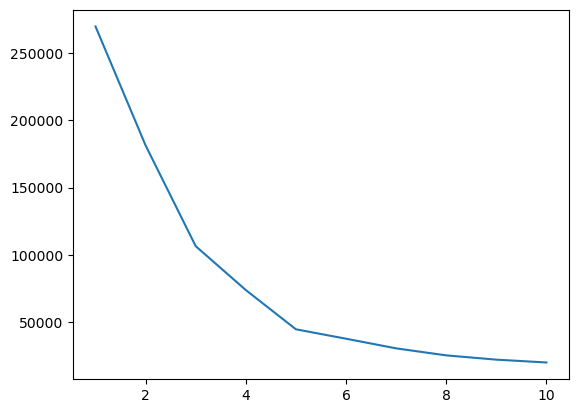

In [162]:
plt.plot(range(1,11),inertia_scores)

In [175]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers.head()

,x,y
0,88.200000,17.114286
1,55.296296,49.518519
2,26.304348,20.913043
3,86.538462,82.128205
4,25.727273,79.363636


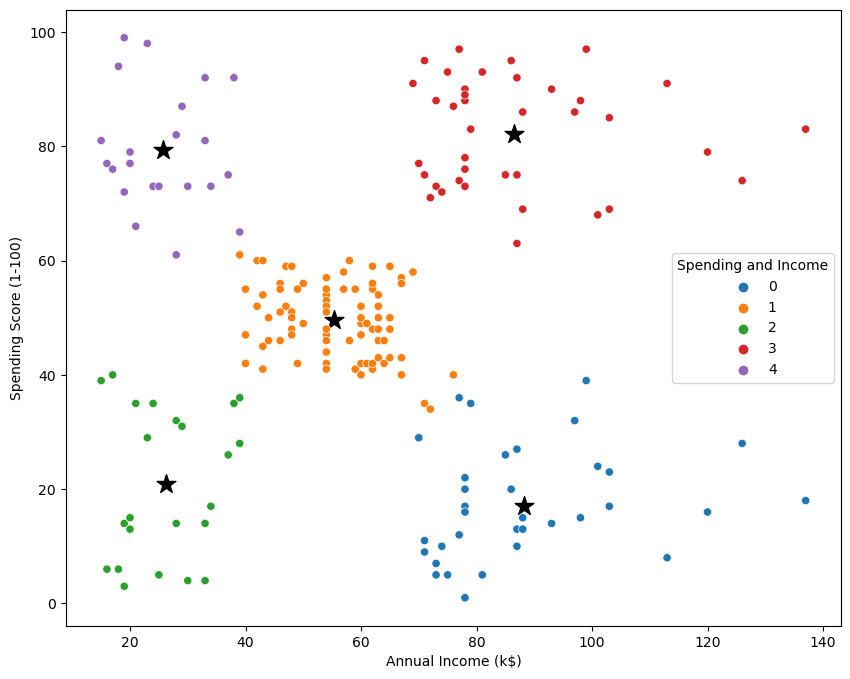

In [207]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=200,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income',palette='tab10')
plt.savefig('clustering_bivariate.png')

In [184]:
pd.crosstab(df['Spending and Income'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.608696,0.391304
3,0.538462,0.461538
4,0.590909,0.409091


In [185]:
df.groupby(['Spending and Income'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,45.217391,26.304348,20.913043
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


### Multivariate Clusters

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
scale = StandardScaler()

In [192]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income
0,Male,19,15,39,0,2
1,Male,21,15,81,0,4
2,Female,20,16,6,0,2
3,Female,23,16,77,0,4
4,Female,31,17,40,0,2


In [195]:
dff = pd.get_dummies(df,dtype=int,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income,Gender_Male
0,19,15,39,0,2,1
1,21,15,81,0,4,1
2,20,16,6,0,2,0
3,23,16,77,0,4,0
4,31,17,40,0,2,0


In [197]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income', 'Gender_Male'],
      dtype='object')

In [202]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [203]:
dff=scale.fit_transform(dff)

In [204]:
dff = pd.DataFrame(scale.fit_transform(dff))

In [205]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i,n_init=10)
    kmeans2.fit(dff)
    inertia_scores2.append(kmeans2.inertia_)

inertia_scores2

[800.0000000000002,
 588.8026767824938,
 476.787554413516,
 386.7147857740688,
 325.7462338542558,
 276.150453552306,
 236.74484773254193,
 199.7847820892609,
 174.1249392159928,
 152.11801327614117]

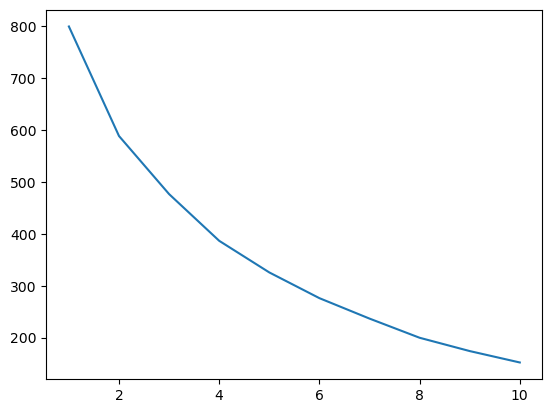

In [206]:
plt.plot(range(1,11),inertia_scores2)

In [208]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income
0,Male,19,15,39,0,2
1,Male,21,15,81,0,4
2,Female,20,16,6,0,2
3,Female,23,16,77,0,4
4,Female,31,17,40,0,2


In [209]:
df2 = pd.read_csv('Mall_Customers.csv')

In [213]:
df['CustomerID']=df2['CustomerID']

In [214]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income,CustomerID
0,Male,19,15,39,0,2,1
1,Male,21,15,81,0,4,2
2,Female,20,16,6,0,2,3
3,Female,23,16,77,0,4,4
4,Female,31,17,40,0,2,5


In [215]:
clustering3 = KMeans(n_clusters=4,n_init=10)
clustering3.fit(dff)
clustering3.labels_

array([3, 3, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 3, 0, 3, 2, 1, 3, 3,
       0, 3, 0, 3, 0, 3, 0, 1, 2, 1, 2, 3, 0, 1, 0, 1, 0, 1, 0, 3, 2, 1,
       0, 1, 0, 1, 1, 1, 0, 3, 1, 2, 0, 2, 0, 2, 1, 2, 2, 3, 0, 0, 2, 3,
       0, 0, 3, 1, 2, 0, 0, 0, 2, 3, 0, 3, 1, 0, 2, 3, 2, 0, 1, 2, 0, 1,
       1, 0, 0, 3, 2, 0, 1, 3, 0, 1, 2, 3, 1, 0, 2, 3, 2, 1, 0, 2, 2, 2,
       2, 1, 0, 3, 1, 1, 0, 0, 0, 0, 3, 0, 1, 3, 1, 1, 2, 3, 2, 3, 2, 3,
       1, 1, 3, 1, 0, 3, 3, 1, 0, 3, 1, 1, 3, 3, 2, 1, 0, 3, 2, 3, 0, 1,
       0, 1, 2, 1, 2, 1, 0, 1, 3, 1, 2, 1, 2, 1, 0, 3, 2, 3, 2, 3, 0, 1,
       2, 3, 2, 3, 0, 1, 2, 1, 0, 3, 0, 3, 0, 1, 0, 1, 2, 1, 0, 1, 0, 3,
       2, 3], dtype=int32)

In [216]:
df['Spending and Income and Age Cluster'] = clustering3.labels_
df.head(20)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income,CustomerID,Spending and Income and Age Cluster
0,Male,19,15,39,0,2,1,3
1,Male,21,15,81,0,4,2,3
2,Female,20,16,6,0,2,3,0
3,Female,23,16,77,0,4,4,1
4,Female,31,17,40,0,2,5,0
5,Female,22,17,76,0,4,6,1
6,Female,35,18,6,0,2,7,0
7,Female,23,18,94,0,4,8,1
8,Male,64,19,3,0,2,9,2
9,Female,30,19,72,0,4,10,1


In [218]:
df.to_csv('Clustering.csv')

In [217]:
centers2 = pd.DataFrame(clustering3.cluster_centers_)
centers2.columns=['x','y']
centers2.head()

ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements